In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 202s 1us/step


In [6]:
# Normalize the data (scale the pixel values to range [0, 1])
X_train, X_test = X_train / 255.0, X_test / 255.0

In [7]:
# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
# Build a simple CNN model
model = models.Sequential()


In [9]:
# Second Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


In [10]:
# Third Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [11]:
# Flatten the data to feed it into Dense layers
model.add(layers.Flatten())


In [12]:
# Fully connected Dense layer
model.add(layers.Dense(64, activation='relu'))

In [13]:
# Output layer (10 categories for CIFAR-10)
model.add(layers.Dense(10, activation='softmax'))

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.4146 - loss: 1.6151 - val_accuracy: 0.5825 - val_loss: 1.1735
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6355 - loss: 1.0471 - val_accuracy: 0.6584 - val_loss: 0.9687
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6960 - loss: 0.8781 - val_accuracy: 0.6694 - val_loss: 0.9318
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7327 - loss: 0.7650 - val_accuracy: 0.6820 - val_loss: 0.9464
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7716 - loss: 0.6564 - val_accuracy: 0.6750 - val_loss: 0.9873
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8031 - loss: 0.5669 - val_accuracy: 0.6862 - val_loss: 0.9513
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8310 - loss: 0.4847 - val_accuracy: 0.6860 - val_loss: 1.0348
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8629 -

In [16]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

313/313 - 1s - 3ms/step - accuracy: 0.6761 - loss: 1.3358
Test accuracy: 0.6761


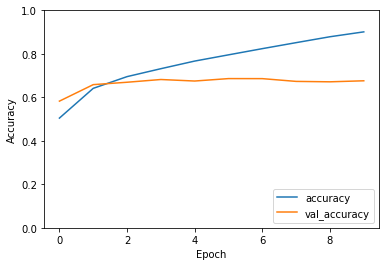

In [17]:
# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [21]:
# Visualizing a few test images with predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [23]:
# Displaying the first 5 images and their predicted labels
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Actual: {class_names[np.argmax(y_test[i])]}, Predicted: {class_names[np.argmax(y_pred[i])]}")
    plt.show()......


SyntaxError: invalid syntax (Temp/ipykernel_2272/828019992.py, line 5)